<div class='bar_title'></div>

*Practical Data Science*

# Descriptive Analytics with Pandas

Matthias Griebel<br>
Chair of Information Systems and Management

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Introducing-Pandas" data-toc-modified-id="Introducing-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introducing Pandas</a></span></li><li><span><a href="#Series-and-DataFrames" data-toc-modified-id="Series-and-DataFrames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Series and DataFrames</a></span></li><li><span><a href="#Basic-DataFrame-operations:-Viewing" data-toc-modified-id="Basic-DataFrame-operations:-Viewing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basic DataFrame operations: Viewing</a></span></li><li><span><a href="#Basic-DataFrame-operations:-Data-Cleaning" data-toc-modified-id="Basic-DataFrame-operations:-Data-Cleaning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Basic DataFrame operations: Data Cleaning</a></span></li><li><span><a href="#Basic-DataFrame-operations:-Slicing,-selecting,-extracting" data-toc-modified-id="Basic-DataFrame-operations:-Slicing,-selecting,-extracting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Basic DataFrame operations: Slicing, selecting, extracting</a></span></li><li><span><a href="#Aggregation-and-Grouping" data-toc-modified-id="Aggregation-and-Grouping-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aggregation and Grouping</a></span></li><li><span><a href="#Applying-functions" data-toc-modified-id="Applying-functions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Applying functions</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Wrapping-up" data-toc-modified-id="Wrapping-up-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Wrapping up</a></span></li></ul></div>

## Motivation

Most of the material of this lecture is adopted from 

- https://github.com/LearnDataSci/article-resources 
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) - Essential Tools for Working with Data" By Jake VanderPlas,  O'Reilly Media



<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png" style="width:50%" />

#### Two ways of exploring data

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/explore_data.png" style="width:60%" />

### Exploratory data analysis (EDA)

EDA allows to
* better understand the data
* build an intuition about the data
* generate hypotheses
* assess assumptions
* find insights

With EDA we can
* get comfortable with the data
* find magic features
* find mistakes or odd values

#### Building intuition about the data

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/intuitive.png" style="width:80%" />

+ Is *336* a Typo?
+ Do we misinterpret the feature (*age in years*)?

## Introducing Pandas

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

We will cover the essential bits of information about pandas, including how to install it, its uses, and how it works with other common Python data analysis packages such as **matplotlib**.

### Typical Use Cases

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like
    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 
- Store the cleaned, transformed data back into a CSV, other file or database

Before you jump into predictive or prescriptive modeling you need to have a good understanding of the nature of your dataset and pandas is a great avenue through which to do that.


### Pandas within the data science toolkit

Not only is the pandas library a central component of the data science toolkit but it is used in conjunction with other libraries in that collection. 

Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.

Jupyter Notebooks offer a good environment for using pandas to do data exploration and modeling, but pandas can also be used in text editors just as easily.

Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file. This saves a lot of time when working with large datasets and complex transformations. Notebooks also provide an easy way to visualize pandas’ DataFrames and plots.



### Installation and Import
Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

`conda install pandas`

OR 

`pip install pandas`

Google Colab has pandas pre-installed.

To import pandas we usually import it with a shorter name since it's used so much:

In [1]:
import pandas as pd

## Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column vector, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/series-and-dataframe.png" style="width:60%" />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

### Creating DataFrames from scratch

Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs. There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we are working on a fulfillment project. We want to have a row for each customer and one colum for order and delivery amount each. To organize this as a dictionary for pandas we could do something like:

In [2]:
data = {
    'ordered': [3, 2, 7, 3], 
    'delivered': [0, 2, 4, 2],
}
purchases = pd.DataFrame(data)
purchases

,ordered,delivered
0,3,0
1,2,2
2,7,4
3,3,2


### Indexing DataFrames

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame. The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [3]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,ordered,delivered
June,3,0
Robert,2,2
Lily,7,4
David,3,2


So now we could **loc**ate a customer's order status by using their name:

In [4]:
purchases.loc['June']

ordered      3
delivered    0
Name: June, dtype: int64

### Reading and writing CSVs
It’s quite simple to load data from various file formats into a DataFrame. With CSV files all you need is a single line to load in the data.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/data/purchases.csv')
df

,customer,ordered,delivered
0,June,3,0
1,Robert,2,2
2,Lily,7,4
3,David,3,2


After extensive data preparation you likely want to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [6]:
df.to_csv('new_purchases.csv')

## Basic DataFrame operations: Viewing

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin. We're loading this dataset from a CSV and designating the movie titles to be our index.

In [7]:
movies_df = pd.read_csv("https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/data/IMDB-Movie-Data.csv", index_col="Title")

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference.

Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. To see the **last** five rows use `.tail()`.

In [8]:
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### Getting info about your data `.info()`

`.info()` should be one of the very first commands you run after loading your data. `.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


### Getting info about your data: `.shape`

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns).

In [10]:
movies_df.shape

(1000, 11)

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

The `.shape` command is used a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

### Describing your variables
Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables. Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually. 

In [11]:
movies_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Describing Categorical Variables
`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [12]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

`.value_counts()` can tell us the frequency of all values in a column:

In [13]:
movies_df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

### Relationships between continuous variables
Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots (seen below in the plotting section). 

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [14]:
movies_df.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


## Basic DataFrame operations: Data Cleaning

### Handling duplicates (1)
Duplicate management is key in most settings involving real data. It is a central data intgegration challenge and we want to be able to perform some basic activities using pandas. This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself. Using `append()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp` so we aren't working with the real data:

In [15]:
temp_df = movies_df.append(movies_df)
temp_df.shape

(2000, 11)

Now we can try dropping duplicates. Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

In [16]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

### Handling duplicates (2)

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:
* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Watch what happens to `temp_df`:

In [17]:
temp_df = movies_df.append(movies_df)  # make a new copy
temp_df = temp_df.drop_duplicates(keep=False)
temp_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### Inplace Operations

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [18]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names. Here's how to print the column names of our dataset:

In [19]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

### Renaming Columns

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [20]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [21]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Operating on many columns
With thousands of columns the previous approach is too much work. Instead of just renaming each column manually we can do a list comprehension:

In [22]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

### Working with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

### Identify missing values
`isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.


In [23]:
movies_df.isnull().head(5)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False


`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`. To count the number of nulls in each column we use an aggregate function for summing: 

In [24]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

### Removing null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [25]:
df_clean = movies_df.dropna()
df_clean.shape

(838, 11)

This operation deletes any **row** with at least a single null value. In our case, it removes 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column:

In [26]:
revenue = movies_df['revenue_millions']

Using square brackets is the general way we select columns in a DataFrame. `revenue` is a Series and we can calculate its mean and fill the nulls using `fillna()`:

In [27]:
revenue_mean = revenue.mean()
print(revenue_mean)
revenue.fillna(revenue_mean, inplace=True)

82.95637614678898


We have now replaced all nulls in `revenue` with the mean of the column:

In [28]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by Genre or Director. For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.


## Basic DataFrame operations: Slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors. 

Let's look at working with columns first.

### By column

You already saw how to extract a column using square brackets like this:

In [29]:
genre_col = movies_df['genre']
type(genre_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names:

In [30]:
genre_col = movies_df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [31]:
subset = movies_df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


### By row
For rows, we have two options: 
- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

In [32]:
prom = movies_df.loc["Prometheus"]
prom[{"description","director"}]

director                                            Ridley Scott
description    Following clues to the origin of mankind, a te...
Name: Prometheus, dtype: object

With `iloc` we give it the numerical index of Prometheus:

In [33]:
prom = movies_df.iloc[1]
prom[{"description","director"}]

director                                            Ridley Scott
description    Following clues to the origin of mankind, a te...
Name: Prometheus, dtype: object

### Conditional selections
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [34]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


### Combining conditions
We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [35]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


### Combining conditions (2)
We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

`(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')`

Using the `isin()` method we could make this more concise:

In [36]:
selection = ['Christopher Nolan', 'Ridley Scott']
movies_df[movies_df['director'].isin(selection)].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


### Combining conditions (3)
Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [37]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

Let's calculate some statistics 

In [38]:
movies_df.std()

rank                   288.819436
year                     3.205962
runtime                 18.810908
rating                   0.945429
votes               188762.647518
revenue_millions        96.412043
metascore               17.194757
dtype: float64

In [39]:
movies_df['revenue_millions'].median()

60.375

###### GroupBy: Split, Apply, Combine
Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/03.08-split-apply-combine.png" style="width:60%" />


##### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [40]:
movies_df.groupby('genre')

In [41]:
movies_df.groupby('genre')['revenue_millions']

In [42]:
movies_df.groupby('genre')['revenue_millions'].median().sort_values(ascending=False)

genre
Adventure,Drama,Fantasy       286.79
Action,Adventure              262.03
Adventure,Fantasy             258.36
Animation,Action,Adventure    215.40
Action,Fantasy,War            210.59
                               ...  
Animation,Comedy,Drama          0.29
Adventure                       0.15
Horror,Mystery,Sci-Fi           0.15
Action,Biography,Crime          0.10
Adventure,Drama                 0.06
Name: revenue_millions, Length: 207, dtype: float64

## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [43]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [44]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Besides being much more concise than a loop structure, using `apply()` will also be much faster than iterating manually over rows because pandas is utilizing vectorization.

## Plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib:

In [45]:
import matplotlib.pyplot as plt

### Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

We will generally opt for ``%matplotlib inline``

In [46]:
%matplotlib inline

A simple plot

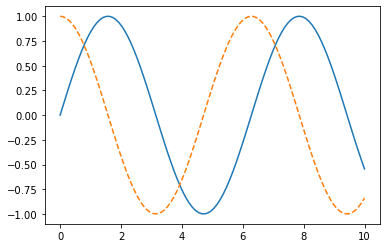

In [47]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### Matplotlib options

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

In [48]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore you're data easily.

**Side note:**
For categorical variables utilize Bar Charts* and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

### Scatterplot

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

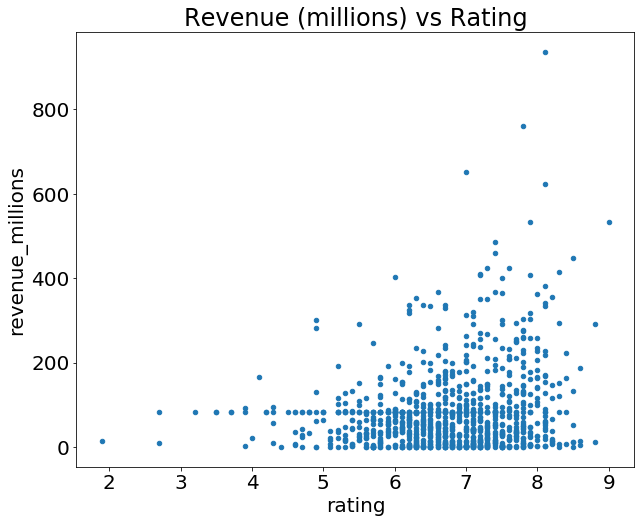

In [49]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

The semicolon is not a syntax error, just a way to hide extra output in Jupyter notebooks.

### Histogram
If we want to plot a simple Histogram based on a single column, we can call plot on a column:

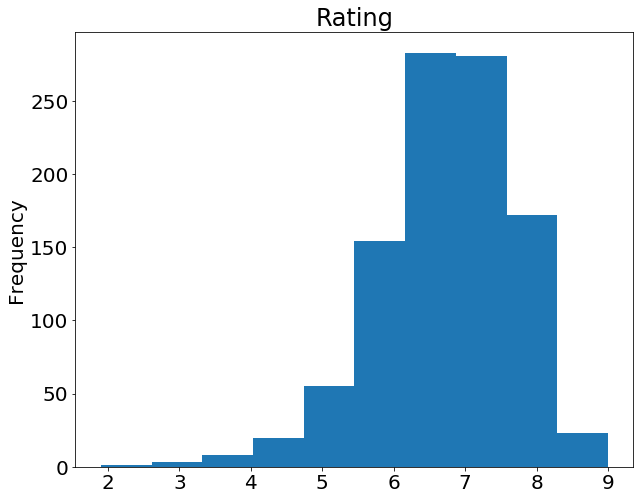

In [50]:
movies_df['rating'].plot(kind='hist', title='Rating');

### Boxplot
Using a Boxplot we can visualize the rating quartiles of the n directors with the most movies:

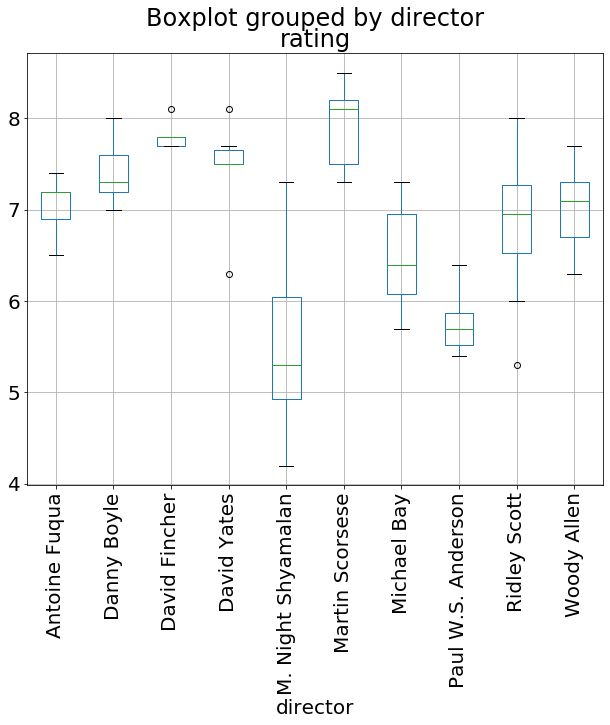

In [51]:
n=10
directors = movies_df['director'].value_counts()[:n].index.tolist()
chart = movies_df[movies_df['director'].isin(directors)].boxplot(column=['rating'], by="director")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## Wrapping up

Exploring, cleaning, transforming, and visualization data with pandas in Python is an essential skill in data science. Just cleaning wrangling data is 80% of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.

To keep improving, view the [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) offered by the official pandas docs, follow along with a few [Kaggle kernels](https://www.kaggle.com/kernels), and keep working on your own projects!